It has been selected: 
 ❐ Variable: tasmax 
 ❐ Model: BNU-ESM 
 ❐ Scenario: rcp85
The file in netCDF format is: agg_macav2metdata_tasmax_BNU-ESM_r1i1p1_rcp85_2006_2099_CONUS_monthly.nc
<xarray.Dataset> Size: 4GB
Dimensions:          (time: 1128, lat: 585, lon: 1386, crs: 1)
Coordinates:
  * time             (time) object 9kB 2006-01-15 00:00:00 ... 2099-12-15 00:...
  * lat              (lat) float64 5kB 25.06 25.1 25.15 ... 49.31 49.35 49.4
  * lon              (lon) float64 11kB 235.2 235.3 235.3 ... 292.9 292.9 292.9
  * crs              (crs) int32 4B 1
Data variables:
    air_temperature  (time, lat, lon) float32 4GB ...
Attributes: (12/46)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    ...  

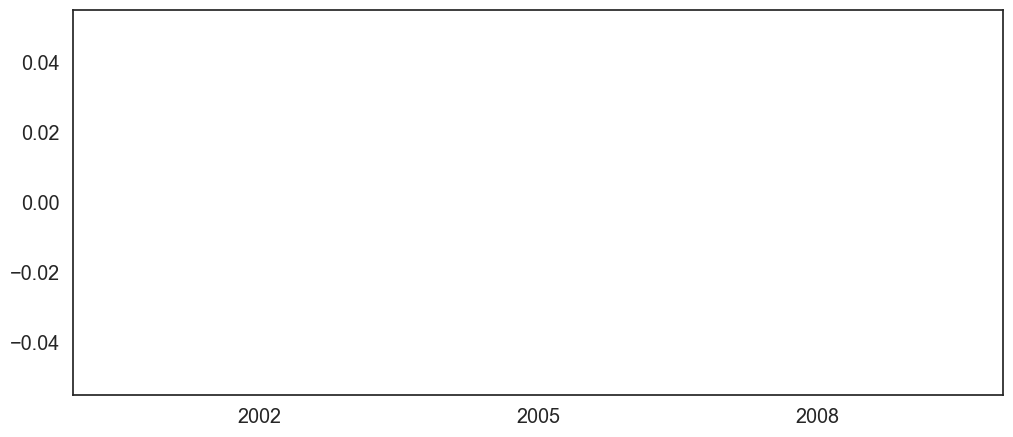

In [ ]:
# Import packages
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

# Plotting options
sns.set(font_scale=1.3, style='white')

# Base url required to download data from the thredds server
dir_path = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/'

# Create the list of the models, variables and scenarios
model_name = ('bcc-csm1-1',
              'bcc-csm1-1-m',
              'BNU-ESM',
              'CanESM2',
              'CCSM4',
              'CNRM-CM5',
              'CSIRO-Mk3-6-0',
              'GFDL-ESM2G',
              'GFDL-ESM2M',
              'HadGEM2-CC365',
              'HadGEM2-ES365',
              'inmcm4',
              'IPSL-CM5A-MR',
              'IPSL-CM5A-LR',
              'IPSL-CM5B-LR',
              'MIROC5',
              'MIROC-ESM',
              'MIROC-ESM-CHEM',
              'MRI-CGCM3',
              'NorESM1-M')
variable_name = ('tasmax',
                 'tasmin',
                 'rhsmax',
                 'rhsmin',
                 'pr',
                 'rsds',
                 'uas',
                 'vas',
                 'huss')
var_long_name = ('air_temperature',
                 'air_temperature',
                 'relative_humidity',
                 'relative_humidity',
                 'precipitation',
                 'surface_downwelling_shortwave_flux_in_air',
                 'eastward_wind',
                 'northward_wind',
                 'specific_humidity')
scenario_type = ('historical', 'rcp45', 'rcp85')

# Year start and ends for each scenario
year_start = ('1950', '2006', '2006')
year_end = ('2005', '2099', '2099')

run_num = [1] * 20
run_num[4] = 6 # CCSM4


# Define the model, variable and scenario
model = 2
var = 0
scenario = 2

try:
    print('It has been selected: \n \u2750 Variable: {} \n \u2750 Model: {} \n \u2750 Scenario: {}'.format(variable_name[var],
                                                                                                            model_name[model],
                                                                                                            scenario_type[scenario]))
except IndexError as e:
    raise IndexError('The variable, model or scenario index is out of range. Please check the lists and select a valid index.')

# Define the time period and domain
try:
    time = year_start[scenario] + '_' + year_end[scenario]
except IndexError as e:
    raise IndexError('The scenario is not between 0 and 2.')

domain = 'CONUS'

# Define the file path
file_name = ('agg_macav2metdata_' +
             str(variable_name[var]) +
             '_' +
             str(model_name[model]) +
             '_r' +
             str(run_num[model])+'i1p1_' +
             str(scenario_type[scenario]) +
             '_' +
             time + '_' +
             domain + '_monthly.nc')

print('The file in netCDF format is: {}'.format(file_name))

full_path = dir_path + file_name

# Open the dataset
try:
    max_temp_xr = xr.open_dataset(full_path)
except OSError as e:
    print("It looks like the file that you are trying to connect to, {}, doesn't exist. Try to revisit your model options to ensure the data exist on the server.".format(full_path))

print(max_temp_xr)

# Select a max temp data point based on lat and lon

print(max_temp_xr.lat.min().values, max_temp_xr.lat.max().values)
print(max_temp_xr.lon.min().values, max_temp_xr.lon.max().values)

lat = 30.00
lon = 245.00

temp_single_point = max_temp_xr['air_temperature'].sel(lat=lat, lon=lon, method='nearest')
print(temp_single_point)
print(temp_single_point.values)
print(temp_single_point.dims)

# Quick plot the data
temp_single_point.plot.line()
plt.show()
